<a href="https://colab.research.google.com/github/kokot123-dev/MISP/blob/main/zaj_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Autor: Michał Rybak 215336 7AIR1

* Nazwa konkursu: Categorical Feature Encoding Challenge
[link](https://www.kaggle.com/c/cat-in-the-dat)
* Krótki opis: W programie przedstawiono klika technik kodowania danych. Sam konkurs również dotyczy kodowania więc będzie przedstawionych kilka popularnych i skutecznych technik. Każda z technik będzie testowana pod względem wydajności i skuteczności.

# 1. Importowanie bibliotek wykorzystanych w zadaniu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cat-in-the-dat/train.csv
/kaggle/input/cat-in-the-dat/test.csv
/kaggle/input/cat-in-the-dat/sample_submission.csv


# 2. Załadowanie danych do treningu i testu 

In [ ]:
df_train=pd.read_csv('../input/cat-in-the-dat/train.csv')
df_test=pd.read_csv('../input/cat-in-the-dat/test.csv')

In [ ]:
print('dane do treningu mają {} wierszy i {} kolumn'.format(df_train.shape[0],df_train.shape[1]))
print('dane do testu mają {} wierszy i {} kolumn'.format(df_test.shape[0],df_test.shape[1]))

X=df_train.drop(['target'],axis=1)
y=df_train['target']


dane do treningu mają 300000 wierszy i 25 kolumn
dane do testu mają 200000 wierszy i 24 kolumn


In [ ]:
df_train.head()
#wyświetlenie 5 pierwszych wierszy, sprawdzenie typu danych w kolumnach pliku danych do treningu

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [ ]:
df_train.info()
#podstawowe informacje o pliku danych (np. zużycie pamięci, wartości inne niż NULL)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
id        300000 non-null int64
bin_0     300000 non-null int64
bin_1     300000 non-null int64
bin_2     300000 non-null int64
bin_3     300000 non-null object
bin_4     300000 non-null object
nom_0     300000 non-null object
nom_1     300000 non-null object
nom_2     300000 non-null object
nom_3     300000 non-null object
nom_4     300000 non-null object
nom_5     300000 non-null object
nom_6     300000 non-null object
nom_7     300000 non-null object
nom_8     300000 non-null object
nom_9     300000 non-null object
ord_0     300000 non-null int64
ord_1     300000 non-null object
ord_2     300000 non-null object
ord_3     300000 non-null object
ord_4     300000 non-null object
ord_5     300000 non-null object
day       300000 non-null int64
month     300000 non-null int64
target    300000 non-null int64
dtypes: int64(8), object(17)
memory usage: 57.2+ MB


**Typy danych w projekcie:**
1. binarne: zmienna binarna 0/1
2. nominalne: zmienna string np. nazwisko
3. kategoryczne: zmienna liczbowa 1-7
4. czasowa: zmienna typu DATA lub TIME
5. porządkowa: zmienna liczbowa np. ocena filmu

# 3. METODA I - kodowanie etykiet

W tej metodzie zmieniamy wszystkie dane na liczbę np. Triangle -> 5, Trapezoid -> 4 itd. Do tego zadania wykorzystany został *Labelencoder* z modułu *sklern*

**Algorytm:**
1. Inicjalizacja klasy *LabelEncoder*
2. Metodą *fit()* dopasowujemy dane
3. Przekształcenie danych w dane klasy *LabelEncoder*

In [ ]:
from sklearn.preprocessing import LabelEncoder

**Obliczanie czasu trwania algorytmu **

In [ ]:
%%time

train=pd.DataFrame() #dwuwymiarowa tabela
label=LabelEncoder() #przekształcanie etykiet nienumerycznych na numeryczne
for c in  X.columns:
    if(X[c].dtype=='object'): #typ do zamiany
        train[c]=label.fit_transform(X[c]) #dopasuj etykiete i zwróć zakodowaną etykiete
    else:
        train[c]=X[c]
        
train.head()    #wyświetl 5 pierwszych wierszy po zamianie 

CPU times: user 2.07 s, sys: 9.88 ms, total: 2.08 s
Wall time: 2.08 s


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,1,1,1,5,5,3,...,1686,2175,2,2,1,7,3,136,2,2
1,1,0,1,0,1,1,1,4,3,5,...,650,11635,1,2,3,0,0,93,7,8
2,2,0,0,0,0,1,0,4,4,5,...,1932,8078,1,1,4,7,17,31,7,2
3,3,0,1,0,0,1,2,4,5,0,...,629,6056,1,2,0,8,3,134,2,1
4,4,0,0,0,0,0,2,4,4,0,...,1760,8231,1,2,2,0,17,158,7,8


In [ ]:

print('zbiór danych do treningu miał {} wierszy i {} kolumn'.format(train.shape[0],train.shape[1]))
#sprawdzenie danych po transformacji


zbiór danych do treningu miał 300000 wierszy i 24 kolumn


**Wyznaczenie skuteczności algorytmu**

In [ ]:
def logistic(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
    #szybkie narzędzie do walidacji danych i testowania
    lr=LogisticRegression() #klasyfikator regresji logistycznej
    lr.fit(X_train,y_train) #dopasuj model
    y_pre=lr.predict(X_test)#prognozuj
    print('Trafność: ',accuracy_score(y_test,y_pre)) #dokładność testowych i prognozy


In [ ]:
logistic(train,y) #odpalenie zdefiniowanej funkcji

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trafność:  0.6901333333333334


# 4. METODA II - funkcja skrótu 


W tej metodzie zamieniamy dowolną cechę w wektor lub macierz. 

In [ ]:
from sklearn.feature_extraction import FeatureHasher

**Obliczanie czasu trwania algorytmu**

In [ ]:
%%time

X_train_hash=X.copy() #kopia listy
for c in X.columns:
    X_train_hash[c]=X[c].astype('str')        #zrzutuj na typ string
hashing=FeatureHasher(input_type='string')    #implementacja algorytmu
train=hashing.transform(X_train_hash.values)  #przekształć w macierz


CPU times: user 8.9 s, sys: 288 ms, total: 9.19 s

Wall time: 9.19 s

In [ ]:

print('zbiór danych do treningu miał {} wierszy i {} kolumn'.format(train.shape[0],train.shape[1]))
#dane po transformacji



zbiór danych do treningu miał 300000 wierszy i 1048576 kolumn

**Wyznaczenie skuteczności algorytmu**

In [ ]:
logistic(train,y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
  
Trafność:  0.7512333333333333

# 5. METODA III - metoda statystyczna 

W tej metodzie modelom nadajemy reprezentacje numeryczną. Zmienne string są zamieniane na liczbę, która reprezentuje ilość jej wystąpienia.

**Obliczanie czasu trwania algorytmu**

In [ ]:
%%time

X_train_stat=X.copy()
for c in X_train_stat.columns:
    if(X_train_stat[c].dtype=='object'):                    #typ do zamiany
        X_train_stat[c]=X_train_stat[c].astype('category')  #zrzutuj na typ category
        counts=X_train_stat[c].value_counts()               #seria unikalnych wartości
                                                            
        counts=counts.sort_index()                          #sortuj majęco po popularności 
        counts=counts.fillna(0)                             #zamień N/A na 0
        counts += np.random.rand(len(counts))/1000          #losowe wartości z zakresu
        X_train_stat[c].cat.categories=counts               #przypisanie nowej wartości do kategorii
    
        
        

CPU times: user 841 ms, sys: 7.04 ms, total: 848 ms

Wall time: 866 ms

In [ ]:
print('zbiór danych do treningu miał {} wierszy i {} kolumn'.format(X_train_stat.shape[0],X_train_stat.shape[1]))
#dane po transformacji        

zbiór danych do treningu miał 300000 wierszy i 24 kolumn

**Wyznaczenie skuteczności algorytmu**

In [ ]:
logistic(X_train_stat,y)

Trafność:  0.6946

# 6. Podsumowanie

Funkcja skrótu zapewniła największa dokładność z zastosowanych funkcji.
1. Kodowanie etykiet: 69% w 2.08s
2. Funkcja skrótu:    75% w 9.52s
3. Metoda statystyczna: 69% w 824 ms

Zgłoszone rozwiązanie:

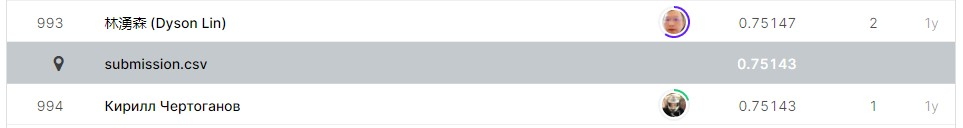